In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset:
df= pd.read_csv("/content/drive/MyDrive/diabetes_.csv")
#df.head()
#df.tail()
#df.describe()
null_values= df.isnull().sum()
print(f"{null_values}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
#• Handle any missing values appropriately, either by dropping or imputing them based on the data.
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols] = df[cols].replace(0, np.nan)
df_clean = df.fillna(df.mean())

#print(df_clean)

X= df_clean.drop(columns="Outcome").values
Y= df_clean["Outcome"].values
#print(X.shape[0])
#print(int(len(X) *0.3))
def train_test_split_scratch(X,Y, test_size=0.3, seed=42):
   np.random.seed(seed)
   indices= np.arange(X.shape[0]) #prints the number from 0 to 767
   np.random.shuffle(indices) #shuffle
   test_split_size= int(len(X) *test_size)
   test_idx= indices[:test_split_size]
   train_idx= indices[test_split_size:]
   X_train= X[train_idx]
   X_test= X[test_idx]
   Y_train=Y[train_idx]
   Y_test=Y[test_idx]
   return X_train,X_test,Y_train,Y_test
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y)
print(f"Xtrain shape {X_train.shape}")
print(f"Xtest shape {X_test.shape}")
print(f"Ytrain shape {Y_train.shape}")
print(f"Ytest shape {Y_test.shape}")


# implementing KNN
def Encludiean_distance(a,b):
  return np.sqrt(np.sum((a-b)**2))

#Predicting the class for a single query.
def knn_predict_single (x, X_train, Y_train,k=3):
  distances = []
  for point in X_train:
      distances.append(Encludiean_distance(x, point))
  sorted_indx= np.argsort(distances)
  nearest_index=sorted_indx[:k]
  nearest_labels= Y_train[nearest_index]
  prediction= np.bincount(nearest_labels).argmax()
  return prediction

#Predicting classes for all test samples.
def knn_predict(X_test, X_train , Y_train, k=3):
  preds=[]
  for sample in X_test:
      preds.append(knn_predict_single(sample, X_train, Y_train,k ))
  return np.array(preds)

#performance accuracy
def compute_accuracy(y_true, y_pred):
  correctvalues= np.sum(y_true==y_pred)
  return (correctvalues/len(y_true)*100)

predictions = knn_predict(X_test, X_train, Y_train, k=5)

accuracy = compute_accuracy(Y_test, predictions)
print(" Predictions:", predictions[:5])
print(f"the accuracy is {accuracy} %")


Xtrain shape (538, 8)
Xtest shape (230, 8)
Ytrain shape (538,)
Ytest shape (230,)
 Predictions: [1 1 0 0 1]
the accuracy is 67.3913043478261 %


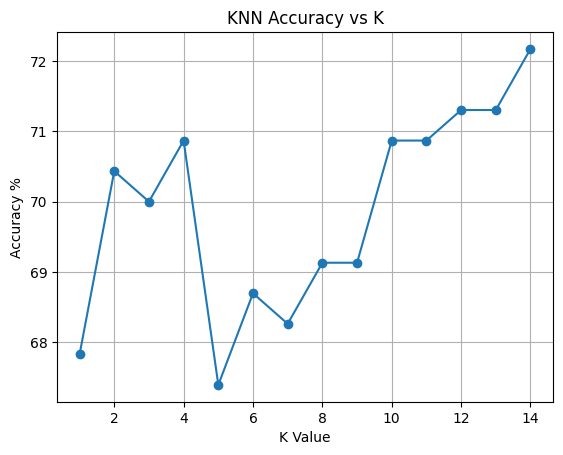

In [4]:
k_values = range(1, 15)
acc_list = []

for k in k_values:
    preds = knn_predict(X_test, X_train, Y_train, k)
    acc_list.append(compute_accuracy(Y_test, preds))

plt.plot(k_values, acc_list, marker="o")
plt.xlabel("K Value")
plt.ylabel("Accuracy %")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()

#problem 2
Xscaled​= X-mean(x) /std(x)

In [5]:
X_mean= X_train.mean(axis=0)
X_std= X_train.std(axis=0)
X_std[X_std==0]=1
X_train_scaled=(X_train -  X_mean)/X_std
X_test_scaled=(X_test -  X_mean)/X_std
#print(f"x train scaled is \n {X_train_scaled[:3]}")
#print(f"x test scaled is \n {X_test_scaled[:3]}")
prediction_scale= knn_predict(X_test_scaled,X_train_scaled,Y_train, k=3)
accuracy_scale= compute_accuracy(Y_test,prediction_scale )
print(f"before unscaled prediction {accuracy}")
print(f"after scaled prediction {accuracy_scale}")
print(f''' here before scaled the accuracy is {accuracy}
but after scaling the prediction is {accuracy_scale} so the accuracy differ by {accuracy-accuracy_scale}''')

before unscaled prediction 67.3913043478261
after scaled prediction 66.95652173913044
 here before scaled the accuracy is 67.3913043478261
but after scaling the prediction is 66.95652173913044 so the accuracy differ by 0.4347826086956559


Problem - 3 - Experimentation with k:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


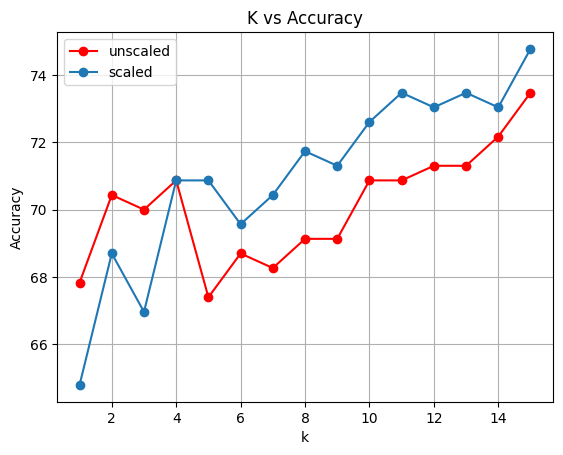

In [9]:
k_values= np.arange(1,16)
print(k_values)
import time
scaled_accuracy= []
unscaled_accuracy= []
time_unscaled=[]
time_scaled=[]
for kk in k_values:
  #unscalad
  unscaled_pred= knn_predict(X_test,X_train,Y_train, kk)
  unscaled_accuracy.append(compute_accuracy(Y_test, unscaled_pred))


  #scaled
  scaled_pred= knn_predict(X_test_scaled,X_train_scaled,Y_train, kk)
  scaled_accuracy.append(compute_accuracy(Y_test, scaled_pred))

  #time

  #unscaled
  t1= time.time()
  knn_predict(X_test,X_train,Y_train, kk)
  t2= time.time()
  time_unscaled.append(t2 - t1)
  #scaled
  t3= time.time()
  knn_predict(X_test_scaled,X_train_scaled,Y_train, kk)
  t4= time.time()
  time_scaled.append(t4-t3)

# plotting graph
plt.plot(k_values,unscaled_accuracy, marker='o',label='unscaled', color='red')
plt.plot(k_values,scaled_accuracy, marker='o',label='scaled')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


• Discuss how the choice of k affects the accuracy and computational cost.

As we see, when the k is too small (1,2,3..) accuracy is usually lower and unstable becuase the model become too sensitive and it reads the noise too so one wrong neighbour can change the prediction. so, when the k is increase the accuracy gradually improves and become more stable becuase more neighbours vote reduce the influence of noise.

In conclusion:
when the value of k increase, the accuracy is also increasing


• Identify the optimal k based on your analysis.

the highest accuracy occurs around k= 15 because the scaled accuracy is more than 75%-80% so we can say that optimal k is 12-15

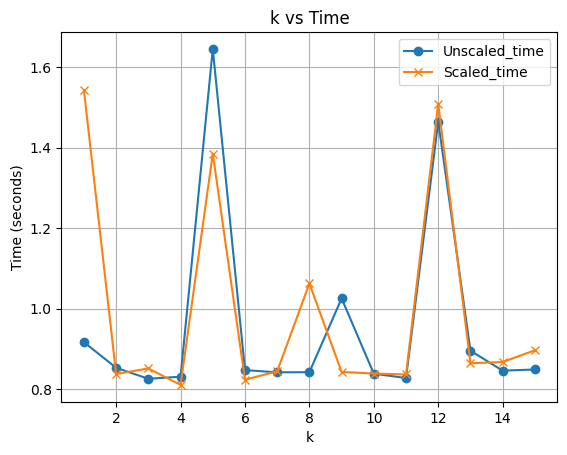

In [7]:
plt.plot(k_values, time_unscaled, marker='o', label='Unscaled_time')
plt.plot(k_values, time_scaled, marker='x', label='Scaled_time')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time")
plt.legend()
plt.grid(True)
plt.show()

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

challenges are:

kNN can be computationally expensive due to the need to calculate
distances for all training examples.
Storage and memory requirements can be significant, especially with
pre-sorting and large datasets.
High-dimensional data exacerbates computational costs and
performance due to the ”curse of dimensionality.”
Efficient data handling techniques (e.g., LSH, condensing) and
dimensionality reduction methods are essential for optimizing kNN
performance.
When d ≫ 0 (i.e., when the
number of dimensions is very large), points drawn from a probability
distribution start to lose similarity, causing the kNN assumption to
break down.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction)

improvement are:

Dimensionality reduction

use efficient data structure

reduce dataset

remove irrelevant or noisy features
